## Bar Charts in R

This data comes from the [MIT International Students Office](http://web.mit.edu/iso/).

In [21]:
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=3,repr.plot.res=300)

In [2]:
intl = read.csv("./dataset/intl.csv")
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Africa","Asia",..: 2 3 6 4 5 1 7 8
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


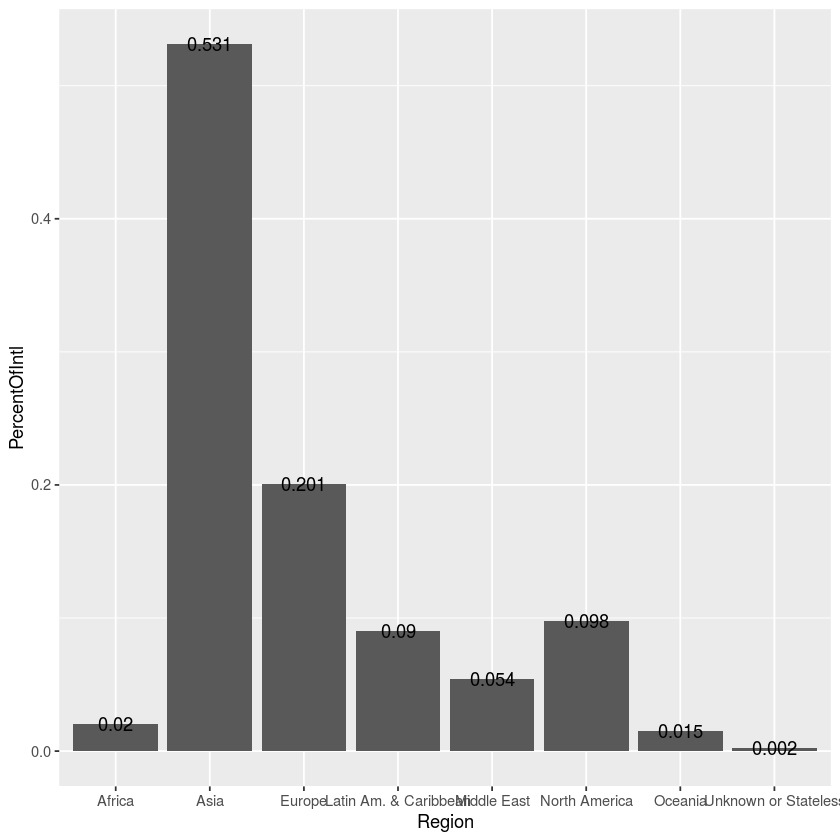

In [5]:
# Barplot
ggplot(intl, aes(x=Region, y=PercentOfIntl)) + 
geom_bar(stat="identity") +
geom_text(aes(label=PercentOfIntl))

In [6]:
intl = transform(intl, Region=reorder(Region, -PercentOfIntl))

In [7]:
str(intl)

'data.frame':	8 obs. of  2 variables:
 $ Region       : Factor w/ 8 levels "Asia","Europe",..: 1 2 3 4 5 6 7 8
  ..- attr(*, "scores")= num [1:8(1d)] -0.02 -0.531 -0.201 -0.09 -0.054 -0.098 -0.015 -0.002
  .. ..- attr(*, "dimnames")=List of 1
  .. .. ..$ : chr  "Africa" "Asia" "Europe" "Latin Am. & Caribbean" ...
 $ PercentOfIntl: num  0.531 0.201 0.098 0.09 0.054 0.02 0.015 0.002


In [8]:
intl$PercentOfIntl = intl$PercentOfIntl * 100

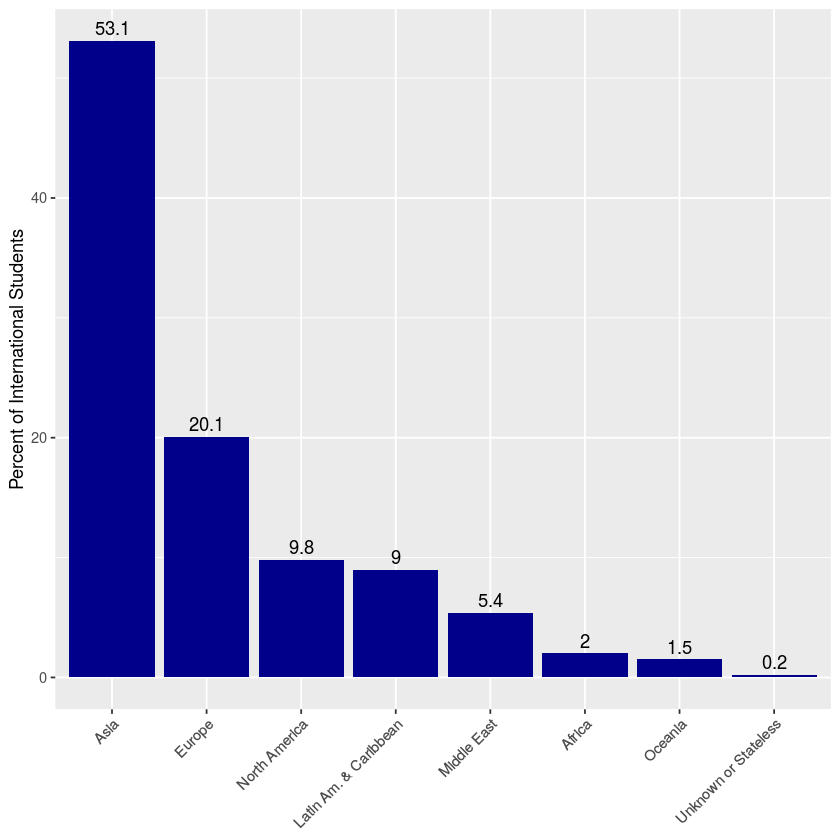

In [9]:
ggplot(intl, aes(x=Region, y=PercentOfIntl)) + 
geom_bar(stat='identity', fill='dark blue') +
geom_text(aes(label=PercentOfIntl), vjust=-0.4) +
ylab("Percent of International Students") + 
theme(axis.title.x = element_blank(), axis.text.x = element_text(angle=45, hjust=1))

## World Maps in R

In [10]:
library(ggmap)

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.



In [11]:
intlall = read.csv("./dataset/intlall.csv", stringsAsFactors = FALSE)
head(intlall)

,Citizenship,UG,G,SpecialUG,SpecialG,ExhangeVisiting,Total
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Albania,3,1,0,0,0,4
2,Antigua and Barbuda,NA,NA,NA,1,NA,1
3,Argentina,NA,19,NA,NA,NA,19
4,Armenia,3,2,NA,NA,NA,5
5,Australia,6,32,NA,NA,1,39
6,Austria,NA,11,NA,NA,5,16


In [12]:
intlall[is.na(intlall)] = 0

In [13]:
head(intlall)

,Citizenship,UG,G,SpecialUG,SpecialG,ExhangeVisiting,Total
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Albania,3,1,0,0,0,4
2,Antigua and Barbuda,0,0,0,1,0,1
3,Argentina,0,19,0,0,0,19
4,Armenia,3,2,0,0,0,5
5,Australia,6,32,0,0,1,39
6,Austria,0,11,0,0,5,16


In [14]:
world_map = map_data("world")

In [15]:
str(world_map)

'data.frame':	99338 obs. of  6 variables:
 $ long     : num  -69.9 -69.9 -69.9 -70 -70.1 ...
 $ lat      : num  12.5 12.4 12.4 12.5 12.5 ...
 $ group    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ order    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ region   : chr  "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ subregion: chr  NA NA NA NA ...


In [16]:
world_map = merge(world_map, intlall, by.x="region", by.y="Citizenship")

In [17]:
str(world_map)

'data.frame':	63634 obs. of  12 variables:
 $ region         : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ long           : num  20.5 20.4 19.5 20.5 20.4 ...
 $ lat            : num  41.3 39.8 42.5 40.1 41.5 ...
 $ group          : num  6 6 6 6 6 6 6 6 6 6 ...
 $ order          : int  789 822 870 815 786 821 818 779 879 795 ...
 $ subregion      : chr  NA NA NA NA ...
 $ UG             : num  3 3 3 3 3 3 3 3 3 3 ...
 $ G              : num  1 1 1 1 1 1 1 1 1 1 ...
 $ SpecialUG      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialG       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ExhangeVisiting: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Total          : int  4 4 4 4 4 4 4 4 4 4 ...


Requires to install:
```R
install.packages("mapproj")
```

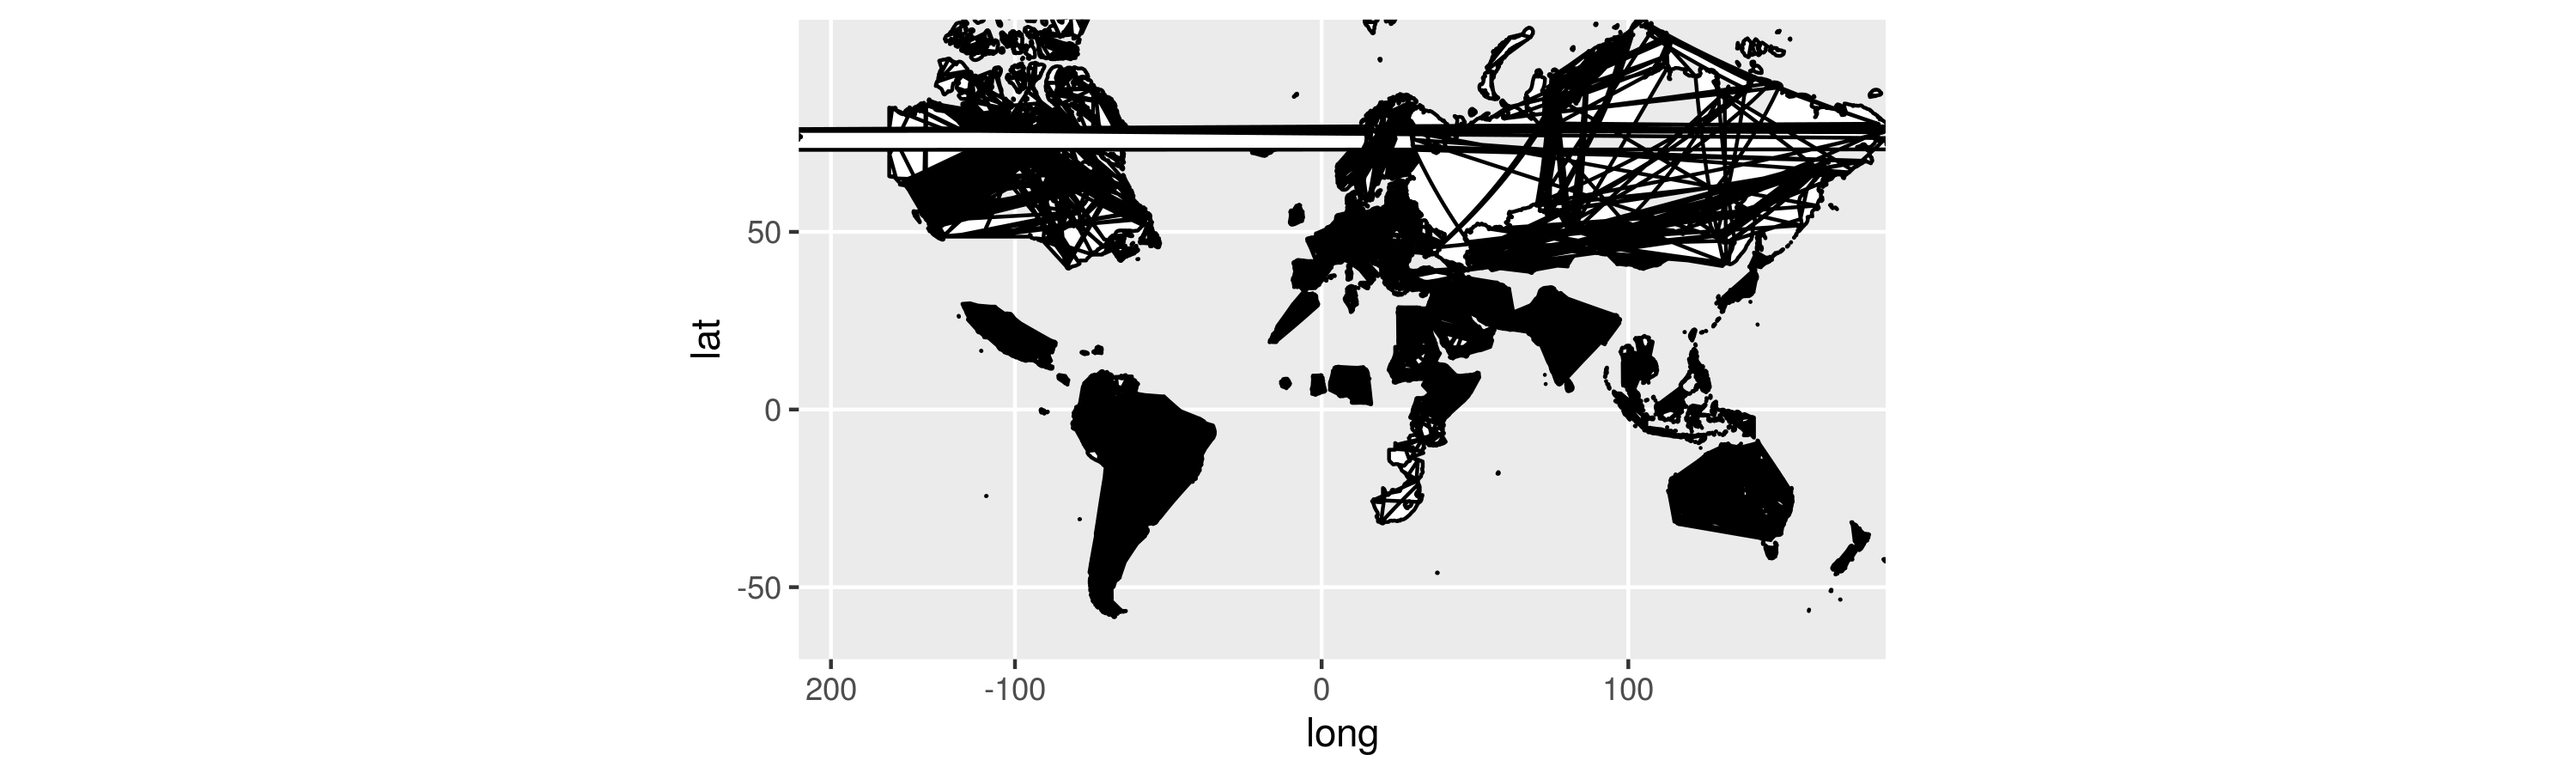

In [22]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black") +
coord_map("mercator")

In [23]:
world_map = world_map[order(world_map$group, world_map$order),]

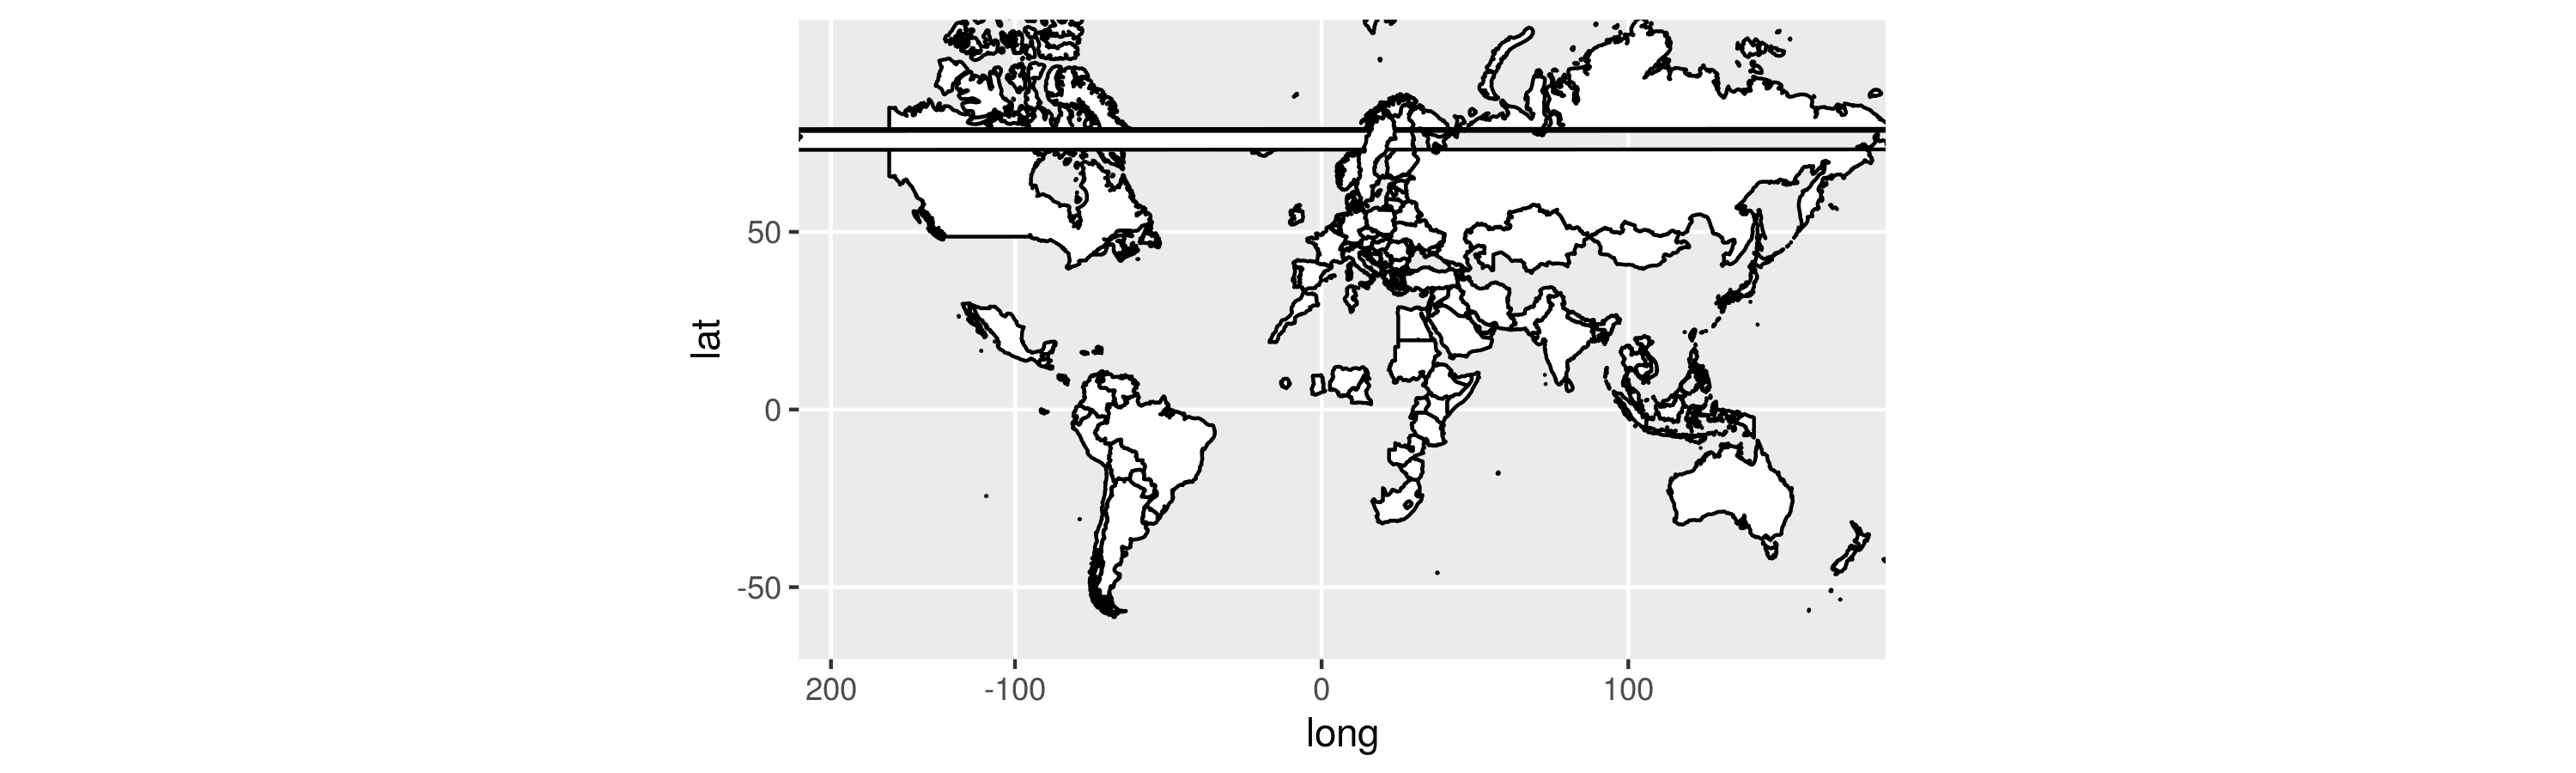

In [24]:
ggplot(world_map, aes(x=long, y=lat, group=group)) +
geom_polygon(fill="white", color="black") +
coord_map("mercator")

In [25]:
table(intlall$Citizenship)


                     Albania          Antigua and Barbuda 
                           1                            1 
                   Argentina                      Armenia 
                           1                            1 
                   Australia                      Austria 
                           1                            1 
                     Bahrain                   Bangladesh 
                           1                            1 
                     Belarus                      Belgium 
                           1                            1 
                     Bolivia           Bosnia-Hercegovina 
                           1                            1 
                      Brazil                     Bulgaria 
                           1                            1 
                    Cambodia                     Cameroon 
                           1                            1 
                      Canada                        Chi

In [27]:
intlall$Citizenship[intlall$Citizenship == 'China (People\'s Republic Of)'] = 'China'

In [28]:
table(intlall$Citizenship)


                     Albania          Antigua and Barbuda 
                           1                            1 
                   Argentina                      Armenia 
                           1                            1 
                   Australia                      Austria 
                           1                            1 
                     Bahrain                   Bangladesh 
                           1                            1 
                     Belarus                      Belgium 
                           1                            1 
                     Bolivia           Bosnia-Hercegovina 
                           1                            1 
                      Brazil                     Bulgaria 
                           1                            1 
                    Cambodia                     Cameroon 
                           1                            1 
                      Canada                        Chi

In [29]:
world_map = merge(map_data("world"), intlall, by.x="region", by.y="Citizenship")

In [30]:
world_map = world_map[order(world_map$group, world_map$order),]

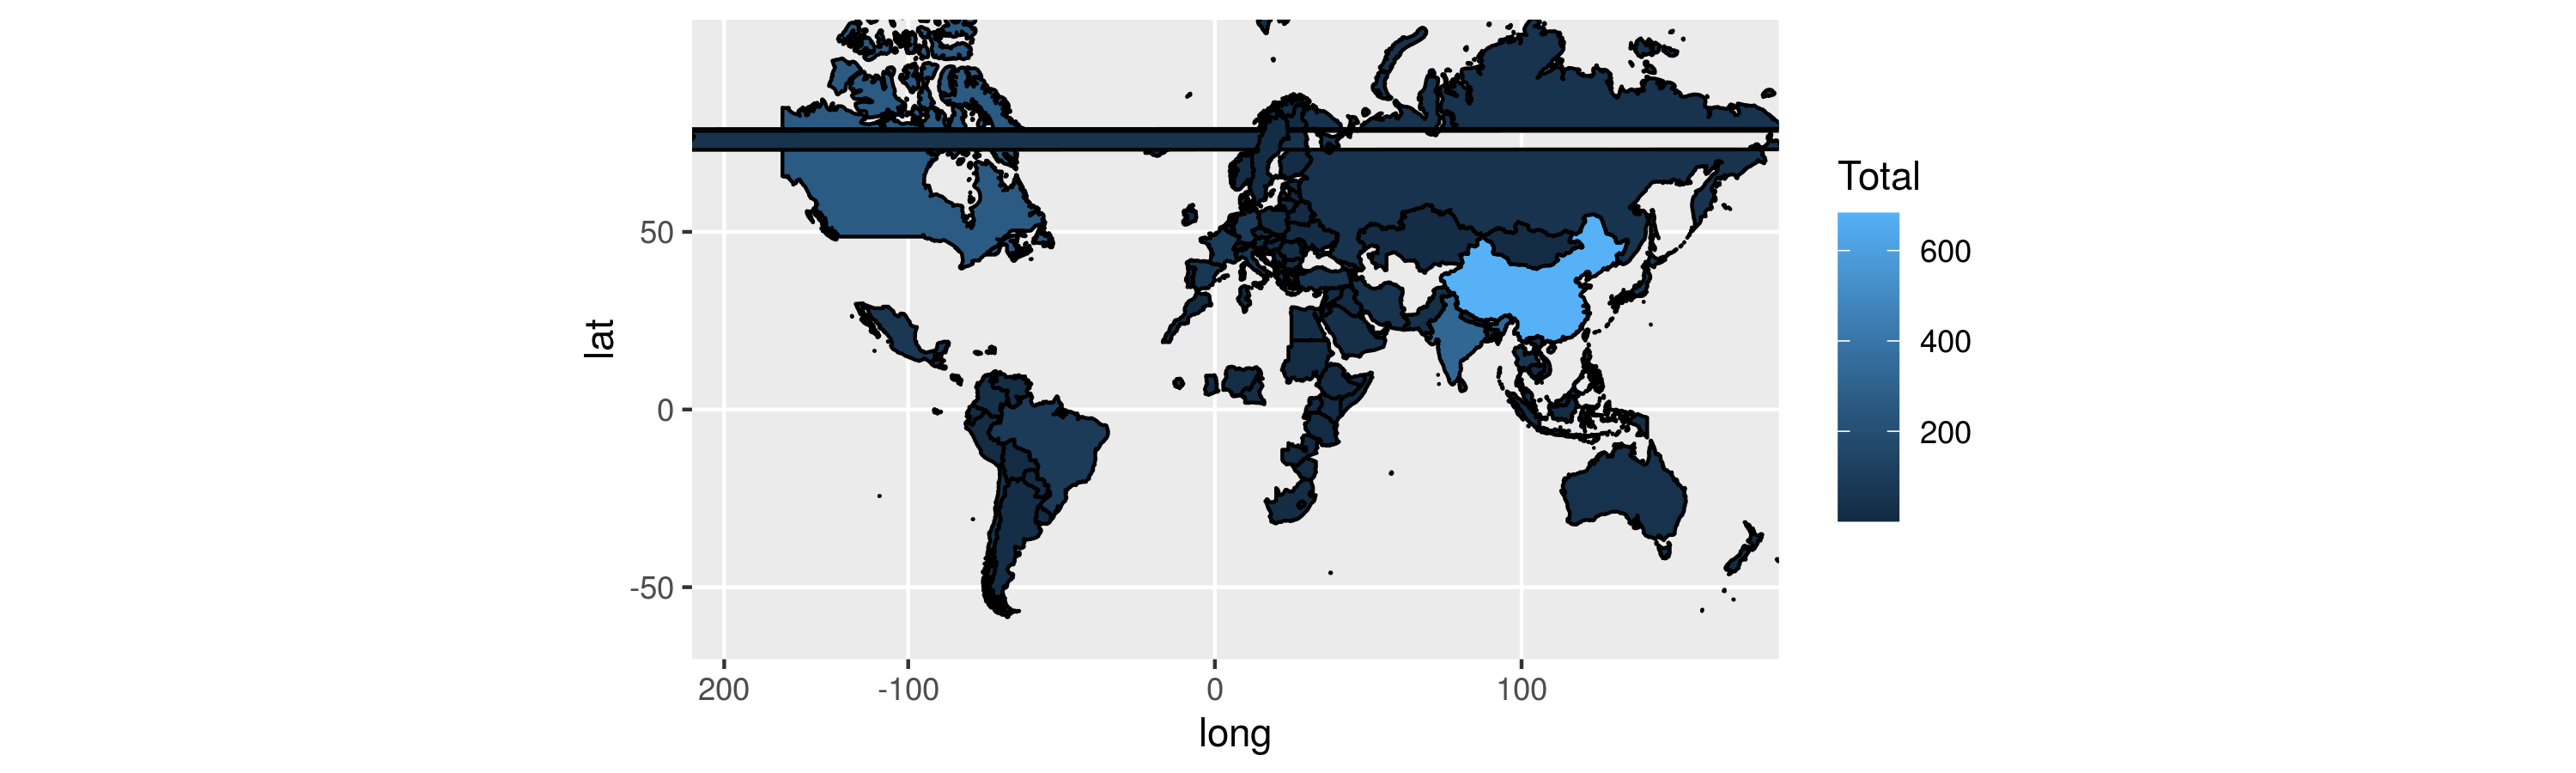

In [31]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
geom_polygon(aes(fill=Total), color="black") +
coord_map("mercator")

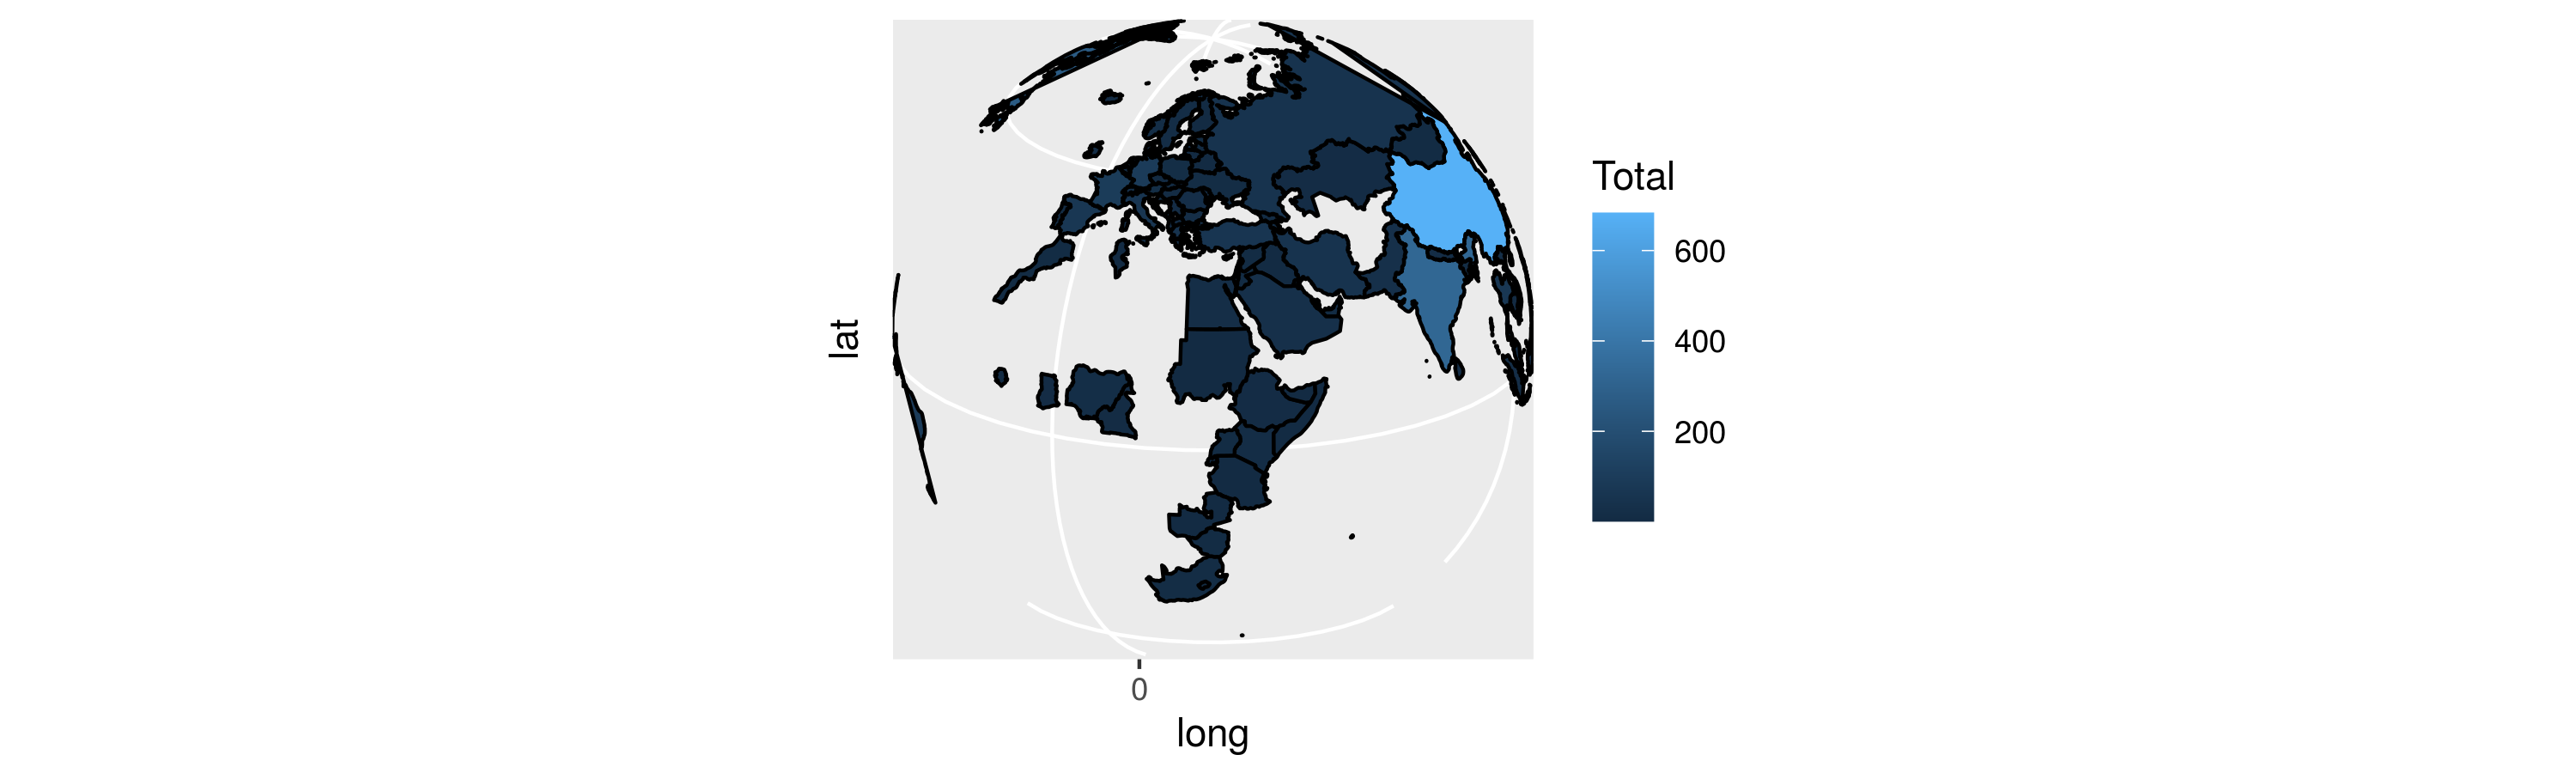

In [32]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
geom_polygon(aes(fill=Total), color="black") +
coord_map("ortho", orientation=c(20, 30, 0))

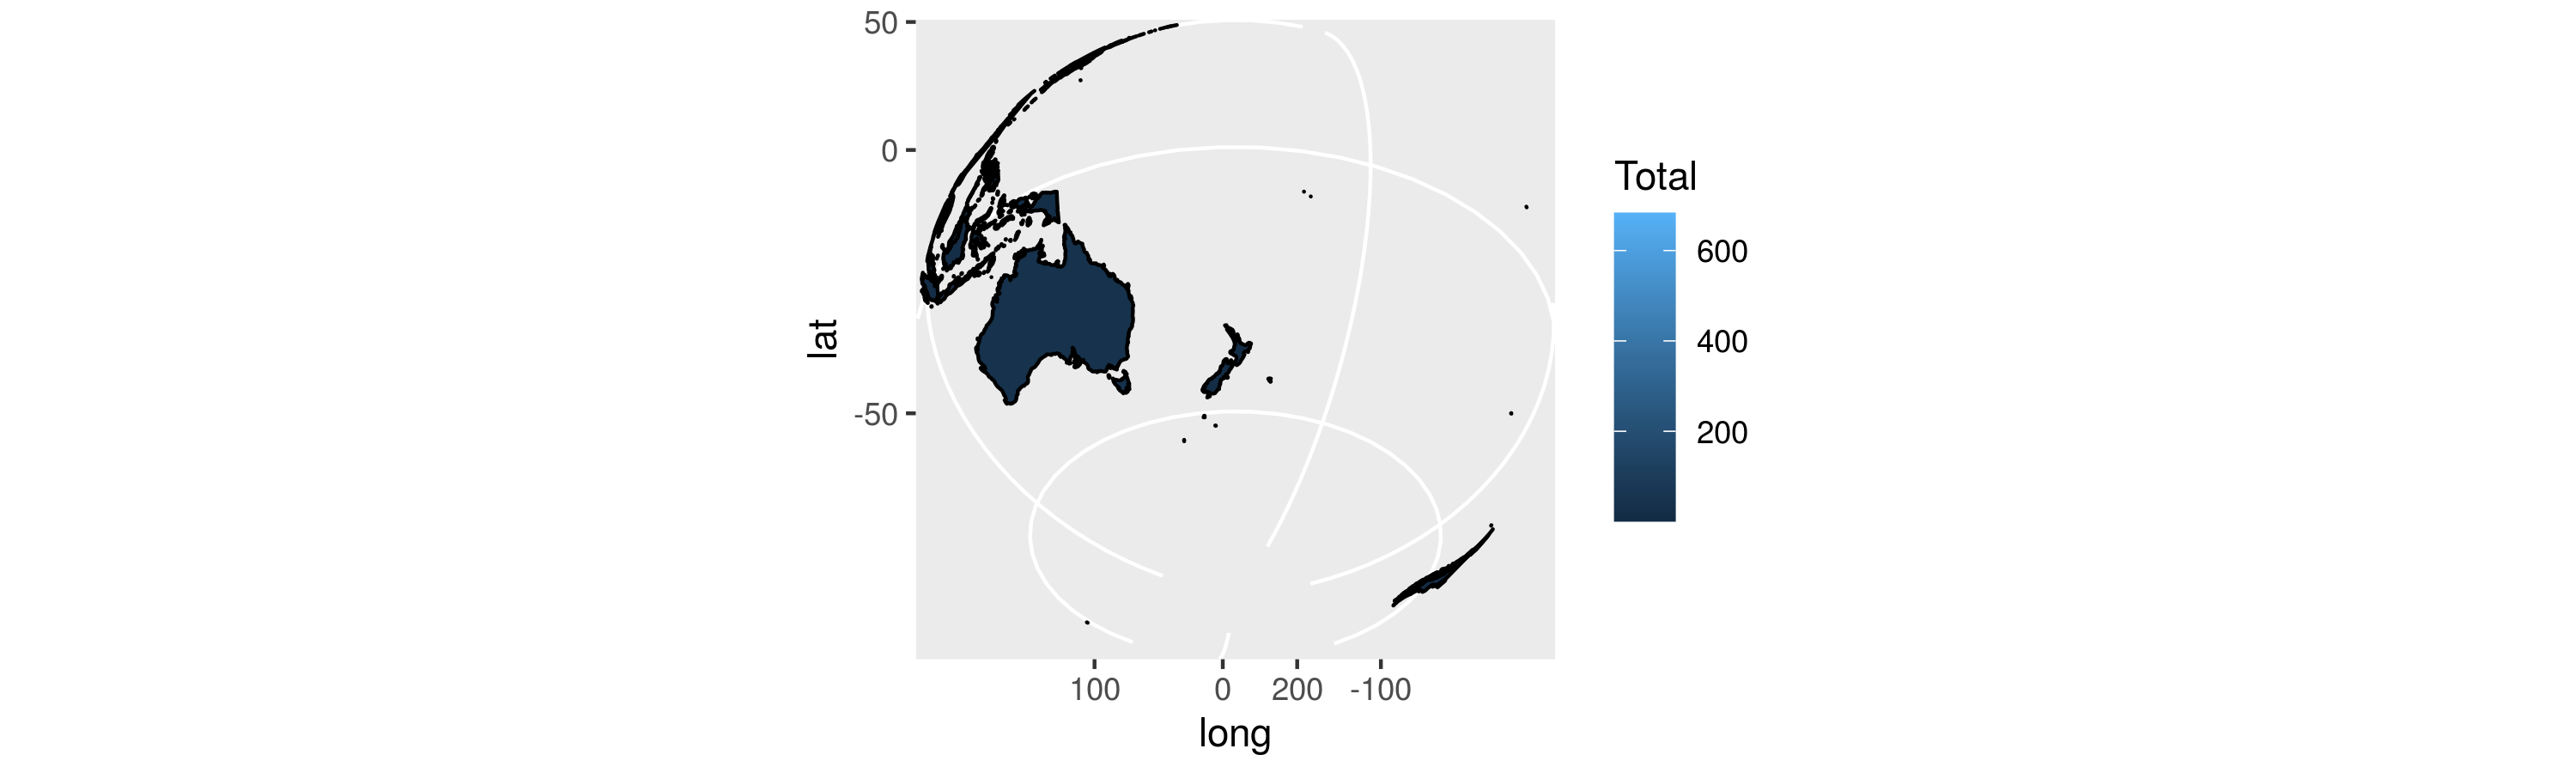

In [33]:
ggplot(world_map, aes(x=long, y=lat, group=group)) + 
geom_polygon(aes(fill=Total), color="black") +
coord_map("ortho", orientation=c(-37, 175, 0))

## Using Line Charts Instead

This data comes from the [U.S. Census Bureau](http://www.census.gov/).

We'll be using the package "reshape2" in this video. It should already be installed for you (it was a dependency of an earlier package), but if the melt function does not work properly for you in this video, go ahead and install and load the package with the commands:
```R
install.packages("reshape2")

library(reshape2)
```

In [35]:
library(reshape2)

In [36]:
households = read.csv("./dataset/households.csv")

In [37]:
str(households)

'data.frame':	8 obs. of  7 variables:
 $ Year          : int  1970 1980 1990 1995 2000 2005 2010 2012
 $ MarriedWChild : num  40.3 30.9 26.3 25.5 24.1 22.9 20.9 19.6
 $ MarriedWOChild: num  30.3 29.9 29.8 28.9 28.7 28.3 28.8 29.1
 $ OtherFamily   : num  10.6 12.9 14.8 15.6 16 16.7 17.4 17.8
 $ MenAlone      : num  5.6 8.6 9.7 10.2 10.7 11.3 11.9 12.3
 $ WomenAlone    : num  11.5 14 14.9 14.7 14.8 15.3 14.8 15.2
 $ OtherNonfamily: num  1.7 3.6 4.6 5 5.7 5.6 6.2 6.1


In [38]:
households[, 1:2]

Year,MarriedWChild
<int>,<dbl>
1970,40.3
1980,30.9
1990,26.3
1995,25.5
2000,24.1
2005,22.9
2010,20.9
2012,19.6


In [39]:
head(melt(households, id="Year"))

,Year,variable,value
,<int>,<fct>,<dbl>
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9


In [40]:
households[, 1:3]

Year,MarriedWChild,MarriedWOChild
<int>,<dbl>,<dbl>
1970,40.3,30.3
1980,30.9,29.9
1990,26.3,29.8
1995,25.5,28.9
2000,24.1,28.7
2005,22.9,28.3
2010,20.9,28.8
2012,19.6,29.1


In [43]:
melt(households, id="Year")[1:10,]

,Year,variable,value
,<int>,<fct>,<dbl>
1,1970,MarriedWChild,40.3
2,1980,MarriedWChild,30.9
3,1990,MarriedWChild,26.3
4,1995,MarriedWChild,25.5
5,2000,MarriedWChild,24.1
6,2005,MarriedWChild,22.9
7,2010,MarriedWChild,20.9
8,2012,MarriedWChild,19.6
9,1970,MarriedWOChild,30.3


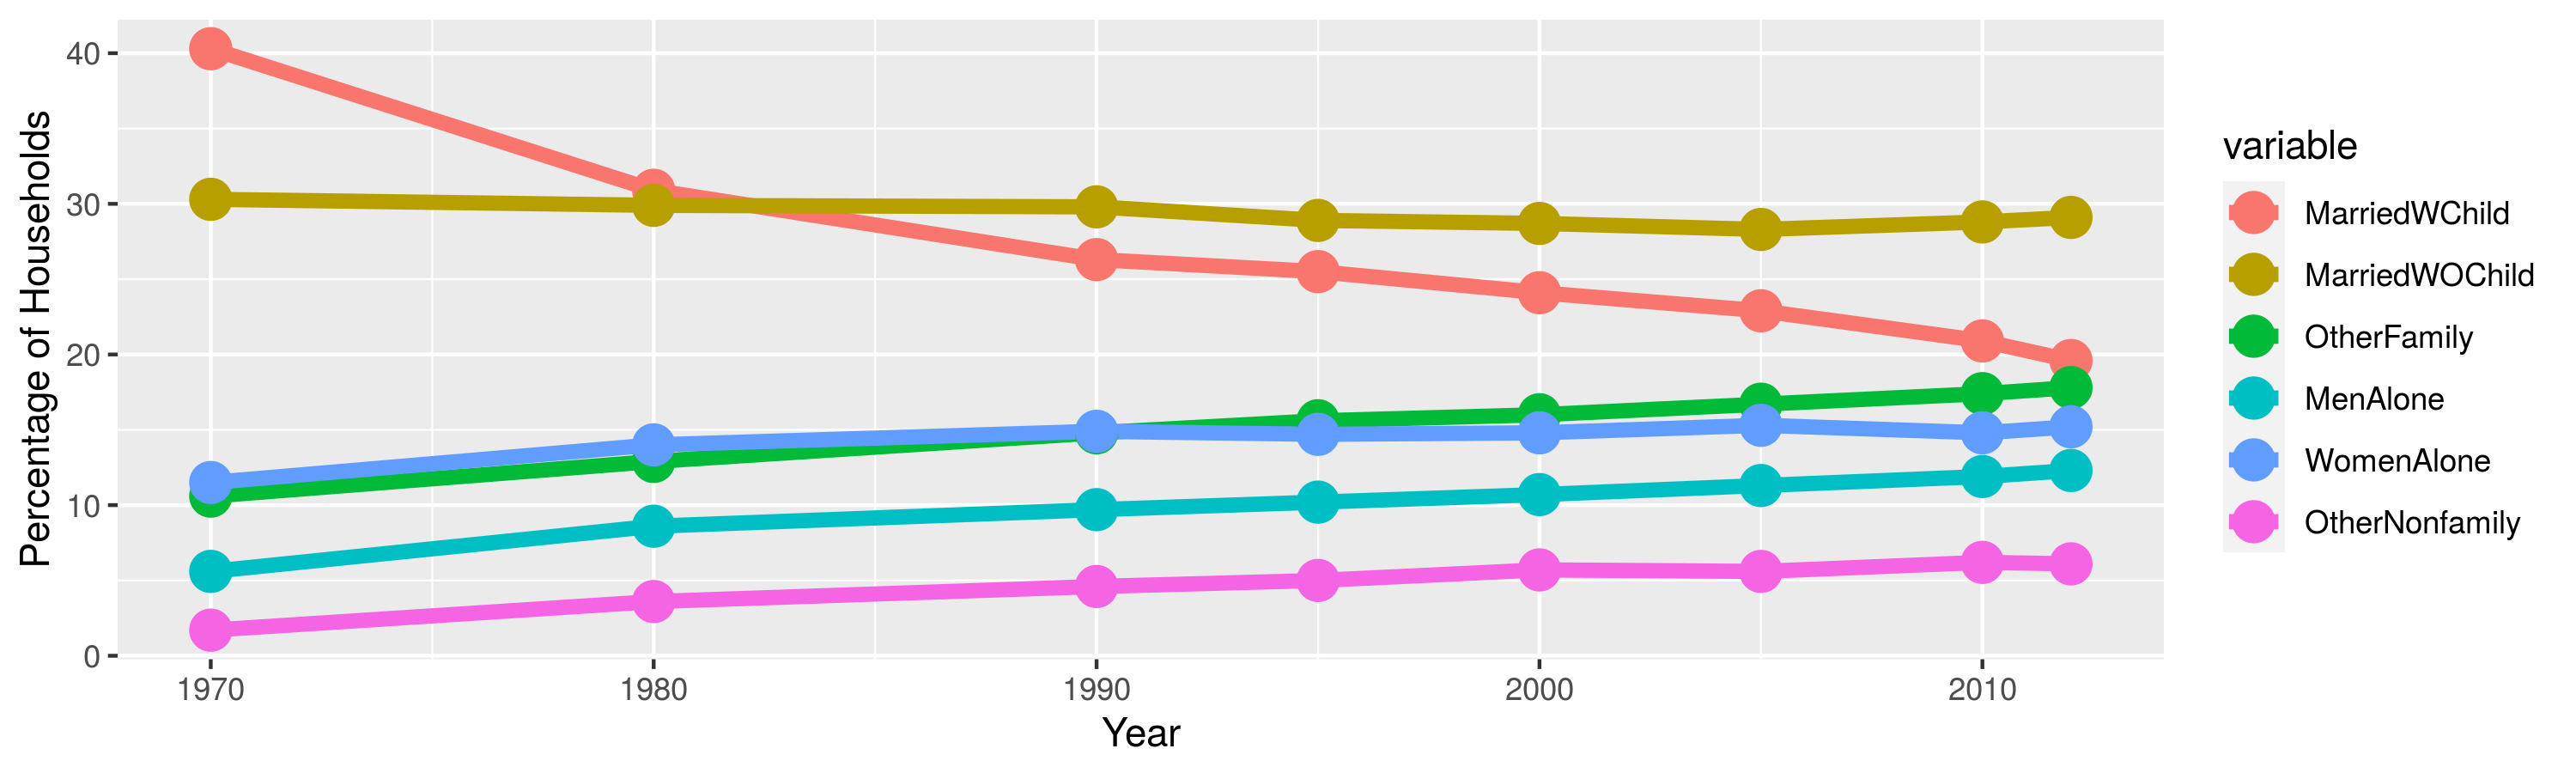

In [44]:
ggplot(melt(households, id="Year"), aes(x=Year, y=value, color=variable)) + 
geom_line(size=2) +
geom_point(size=5) + 
ylab("Percentage of Households")